## TECHIN 513 HW1 – Modifying Signals

Ghea C Suyono

### Assignment 3: Time Scaling Audio Signals

#### Part A

In [2]:
#Import relevant libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile as wavfile
import scipy.signal as sig
import simpleaudio as sa


In [27]:
# Import the audio file
fs1, x1 = wavfile.read('sounds/train32.wav')
t_x1 = (np.arange(0, len(x1), 1))/fs1


In [28]:
#Timescale function from Assignment 1

def timescale(x, fs,a):
    ratio = (np.double(a).as_integer_ratio())
    numerator = ratio[0]
    denominator = ratio[1]
    y = sig.resample_poly([float(i) for i in x], denominator, numerator)
    t = (np.arange(0, len(y), 1)) / fs
    return y, t

#### Part B

Obtain w(t)=x1(2t) and v(t)=x1(0.5t) using above timescale function

In [15]:
# Part a
# w = scaled signal
# t_w = time vector for scaled signal
a = 2

w, t_w = timescale(x1, fs1, a)
print('w:', w, 't_w:', t_w)

# Part b
# w = scaled signal
# t_w = time vector for scaled signal
a = 0.5
v, t_v = timescale(x1, fs1, a)
print('v:', v, 't_v:', t_v)

w: [-720.59515602 -710.89801037   -2.27496413 ...  595.03570116  328.19656256
   49.89027877] t_w: [0.0000000e+00 3.1250000e-05 6.2500000e-05 ... 7.8606250e-01 7.8609375e-01
 7.8612500e-01]
v: [ -901.46624101 -1063.18300467  -943.48797477 ...    98.75996632
    45.02328618    12.83713652] t_v: [0.00000000e+00 3.12500000e-05 6.25000000e-05 ... 3.14446875e+00
 3.14450000e+00 3.14453125e+00]


Create a time-reversed version of the signal z(t)=x1(-t) by reversing the order of
elements in the sequence.

In [29]:
# Part c and d

t_z = t_x1
# 1. Reverse the x1 signal
z= x1[::-1]

# 2. Use z(t) = np.ascontiguousarray(z(t)) to convert z(t) to a C-contiguous array
z = np.ascontiguousarray(z)

# 3. Save the reversed signal as a .wav file
wavfile.write('sounds/train32_reversed.wav', fs1, z.astype(np.int16))

#### Part C

Create a plot of the four signals (x1, w, v and z):  
    1. Use 4 x 1 subplot  
    2. time axis in ms (multiply the time array by 1000)  
    3. No overlap in spacing  

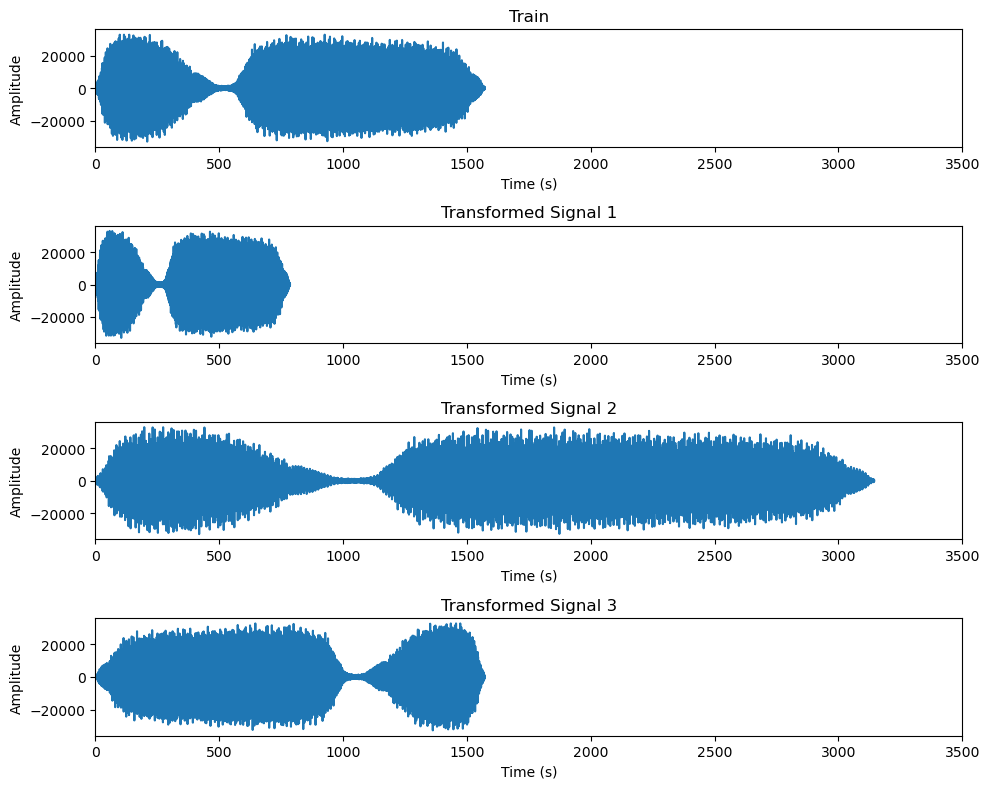

In [34]:
# 1. Convert the time to ms
t_x1_ms = t_x1 * 1000
t_w_ms = t_w * 1000
t_v_ms = t_v * 1000
t_z_ms = t_z * 1000

# 2. Define x and y axis limits
x_axis_range = [min(t_x1_ms), 3500]

# Create a figure
plt.figure(figsize=(10, 8))

# First subplot
plt.subplot(4, 1, 1)  # 4x1 grid
plt.plot(t_x1_ms, x1)
plt.title('Train')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.xlim(x_axis_range)

# Second subplot
plt.subplot(4, 1, 2) 
plt.plot(t_w_ms, w)
plt.title('Transformed Signal 1')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.xlim(x_axis_range)

# Third subplot
plt.subplot(4, 1, 3)  
plt.plot(t_v_ms, v)
plt.title('Transformed Signal 2')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.xlim(x_axis_range)

# Fourth subplot
plt.subplot(4, 1, 4)  
plt.plot(t_z_ms, z)
plt.title('Transformed Signal 3')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.xlim(x_axis_range)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()